In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_excel('churn_data.xlsx')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Dropar a coluna Plano de Acesso
df = df.drop(columns=["customerID"])

# Exibir as primeiras linhas do DataFrame para confirmar
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Criar uma cópia do DataFrame para aplicar as transformações
df_transformed = df.copy()

# Converter todas as colunas categóricas para strings
categorical_columns = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
                       "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
                       "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

df_transformed[categorical_columns] = df_transformed[categorical_columns].astype(str)

# Aplicar Label Encoding nas colunas categóricas
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_transformed[column] = label_encoder.fit_transform(df_transformed[column])

# Aplicar MinMaxScaler nas colunas numéricas (exceto churn)
scaler = MinMaxScaler()
numeric_columns = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

df_transformed[numeric_columns] = scaler.fit_transform(df_transformed[numeric_columns])

# Exibir as primeiras linhas do DataFrame transformado
df_transformed.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0.0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0.0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0.0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0.0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separando as features (X) e a variável target (y)
X = df_transformed.drop(columns=["Churn"])  # Features (sem a variável target)
y = df_transformed["Churn"]  # Target (churn)




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Instanciar o modelo de Regressão Logística
log_model = LogisticRegression(random_state=42, max_iter=1000)

# Treinando o modelo
log_model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred_log = log_model.predict(X_test)

# Avaliando o modelo
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_log))
print("Relatório de Classificação Regressão Logística:\n", classification_report(y_test, y_pred_log))


Acurácia Regressão Logística: 0.7860696517412935
Relatório de Classificação Regressão Logística:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407



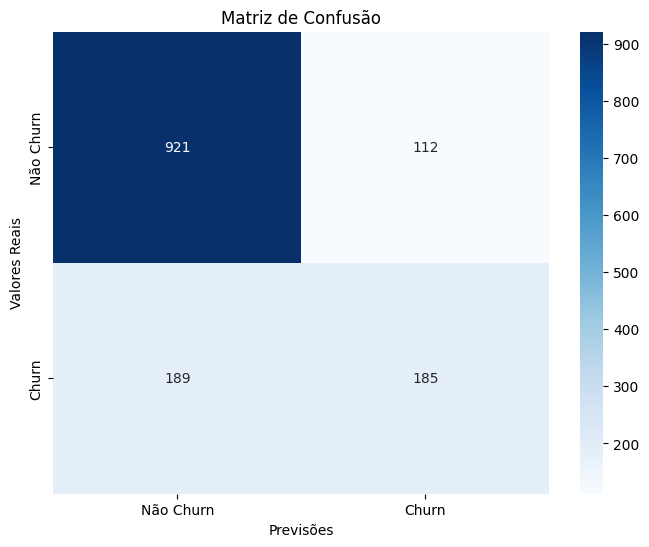

In [ ]:
#import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#import seaborn as sns

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_log)

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Não Churn", "Churn"], yticklabels=["Não Churn", "Churn"])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()


In [ ]:
# Dividindo os dados em treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Treinando o modelo
rf_model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = rf_model.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7910447761194029
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



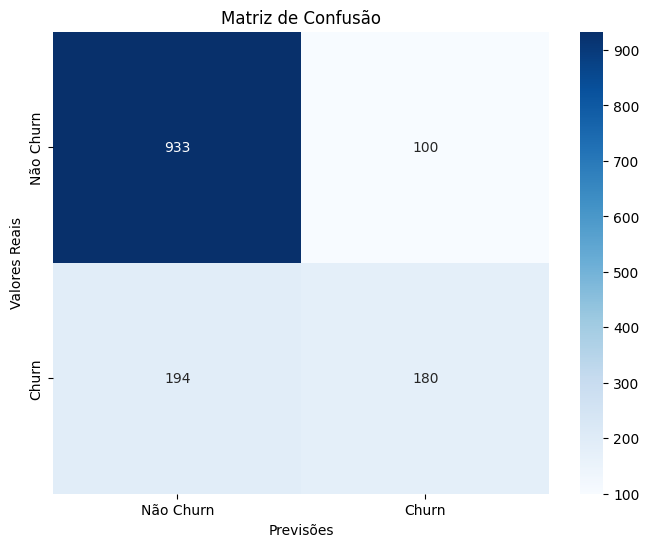

In [ ]:
#import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#import seaborn as sns

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Não Churn", "Churn"], yticklabels=["Não Churn", "Churn"])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()


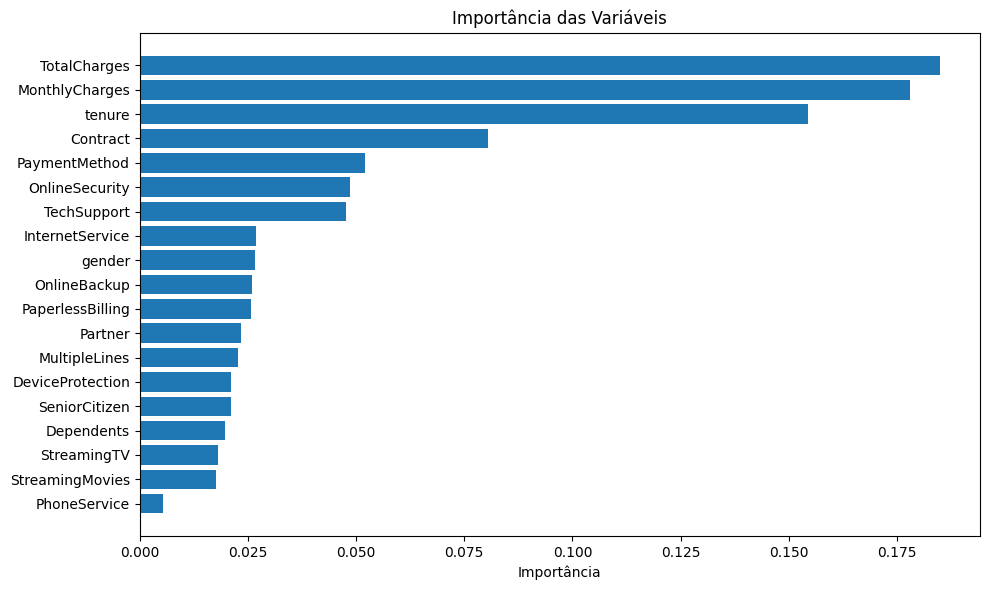

In [ ]:
# Importância das Features
importances = rf_model.feature_importances_

# Ordenar as features por importância
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plotar as importâncias das variáveis como barras horizontais, em ordem decrescente
plt.figure(figsize=(10, 6))
plt.title('Importância das Variáveis')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.gca().invert_yaxis()  # Inverter o eixo Y para que as mais importantes apareçam no topo
plt.xlabel('Importância')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores parâmetros Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Melhores parâmetros Regressão Logística: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


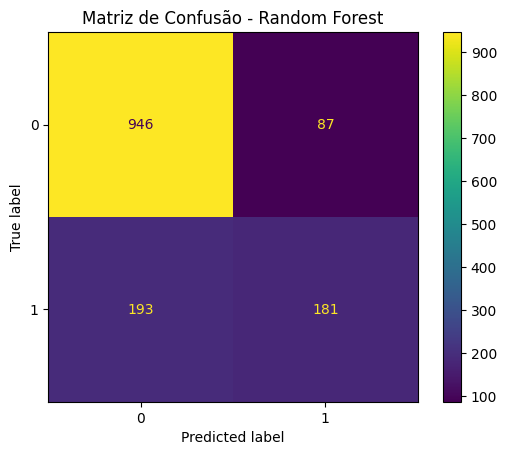

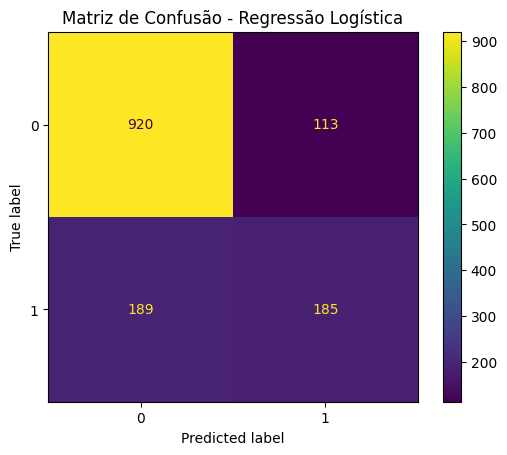

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# Definindo o espaço de parâmetros para Random Forest e Regressão Logística
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Realizando o GridSearch para Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Obtendo os melhores parâmetros do modelo Random Forest
best_rf = grid_search_rf.best_estimator_
print("Melhores parâmetros Random Forest:", best_rf.get_params())

# Realizando o GridSearch para Regressão Logística
grid_search_lr = GridSearchCV(log_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Obtendo os melhores parâmetros do modelo de Regressão Logística
best_lr = grid_search_lr.best_estimator_
print("Melhores parâmetros Regressão Logística:", best_lr.get_params())

# Fazendo as previsões com os melhores modelos
y_pred_rf = best_rf.predict(X_test)
y_pred_lr = best_lr.predict(X_test)

# Exibindo a matriz de confusão para Random Forest
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Exibindo a matriz de confusão para Regressão Logística
ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test)
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Avaliando o modelo Random Forest com os melhores parâmetros
y_pred_rf = best_rf.predict(X_test)
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação Random Forest:\n", classification_report(y_test, y_pred_rf))

# Avaliando o modelo Regressão Logística com os melhores parâmetros
y_pred_lr = best_lr.predict(X_test)
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_lr))
print("Relatório de Classificação Regressão Logística:\n", classification_report(y_test, y_pred_lr))


Acurácia Random Forest: 0.8009950248756219
Relatório de Classificação Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.68      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Acurácia Regressão Logística: 0.7853589196872779
Relatório de Classificação Regressão Logística:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

